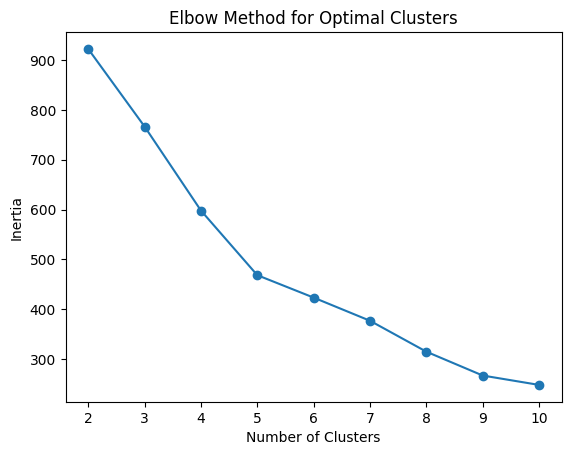

Davies-Bouldin Index: 1.1660094885100918
Silhouette Score: 0.3252531310797527


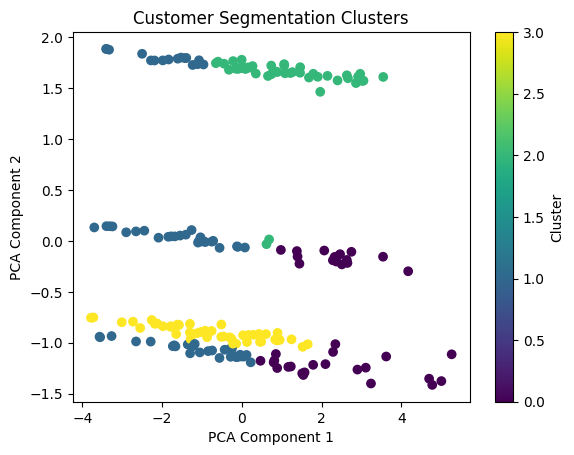

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

data = transactions.merge(customers, on='CustomerID')

customer_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique',
    'TransactionID': 'count',
    'Region': 'first'
}).reset_index()

customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data.drop('CustomerID', axis=1))

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

customer_data['Cluster'] = clusters

db_index = davies_bouldin_score(scaled_features, clusters)
sil_score = silhouette_score(scaled_features, clusters)

print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {sil_score}')

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
